In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        self.l = np.cross(self.r,self.p)
        self.f = np.array([0.,-9.81*self.m])
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
        
        self.L = np.zeros(len(t))
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.Eu = np.zeros_like(self.VEk)
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetForce(i)
        
        self.a = self.f/self.m
        
        # Euler
  #      self.r += self.dt*self.v
  #      self.v += self.dt*self.a
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        self.p = self.v*self.m
            
     
    # Aca debes agregar la energía potencial

    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.L[i] = np.cross(self.r,self.p)
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        self.Eu[i] = self.m*9.81*self.r[1]
        
    def SetForce(self,i):
        self.F[i] = self.f
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetAngularMomentum(self,scale=1):
        return self.L[::scale]
    
    def GetPotentialEnergy(self,scale=1):
        return self.Eu[::scale]
    
    def GetForce(self,scale=1):
        return self.F[::scale]
    
    # Debes agregar las paredes en este punto
    def CheckLimits(self):
        
        for i in range(2):
            
            if self.r[i] + self.radius > 20 and self.v[i] > 0.:
                self.v[i] = -0.9*self.v[i]
            elif self.r[i] - self.radius < -20 and self.v[i] < 0.:
                self.v[i] = -0.9*self.v[i]

In [3]:
def GetParticles(N,t):
    
    r0 = np.array([-15.,-10.])
    v0 = np.array([2.,0])
    a0 = np.array([0.,0.])
    
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    
    Particles = [p0]
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [4]:
dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
Particles = GetParticles(1,t)

In [5]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].CheckLimits()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [6]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 30000/30000 [00:01<00:00, 24412.39 Steps/s]


In [7]:
# Bajamos dimensión de la simulacion
scale = 100
t1 = t[::scale]

<IPython.core.display.Javascript object>


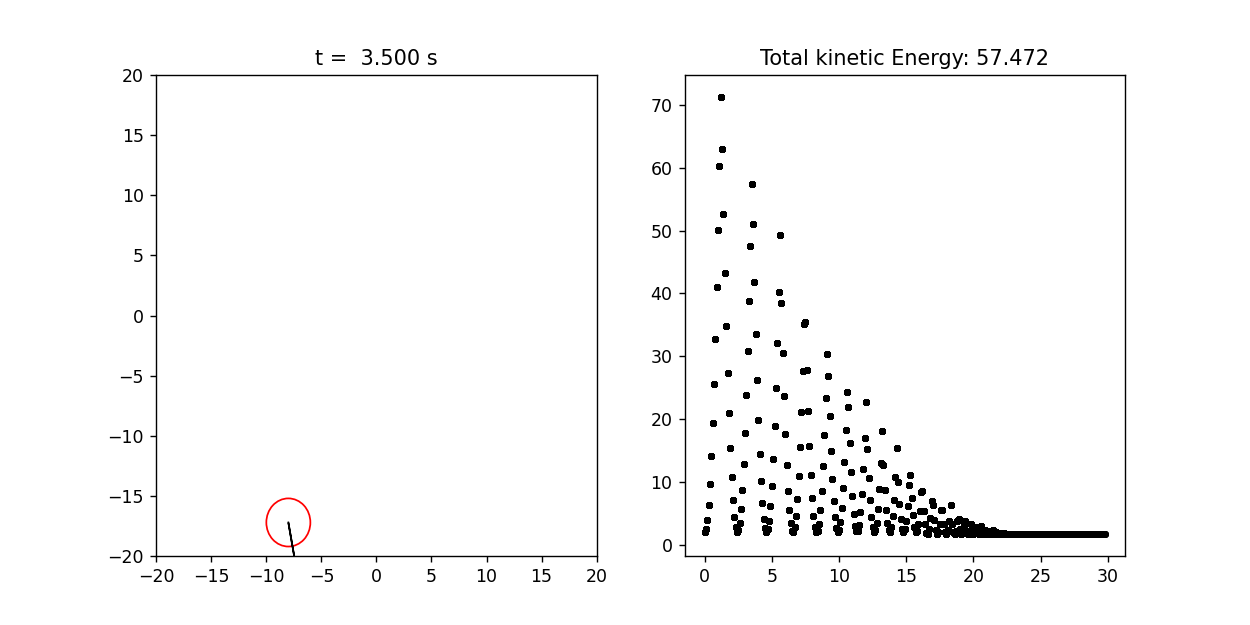

In [8]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [9]:
"""
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
#Animation.save('EsferaDura.mp4', writer=writer_)
"""

"\nWriter = anim.writers['ffmpeg']\nwriter_ = Writer(fps=10, metadata=dict(artist='Me'))\n#Animation.save('EsferaDura.mp4', writer=writer_)\n"

En la animación de arriba se puede ver que la bola deja de rebotar alrededor de los 23s.

In [10]:
MomentumT = Particles[0].GetMomentum(scale)

In [11]:
AngularMomentumT = Particles[0].GetAngularMomentum(scale)

<IPython.core.display.Javascript object>


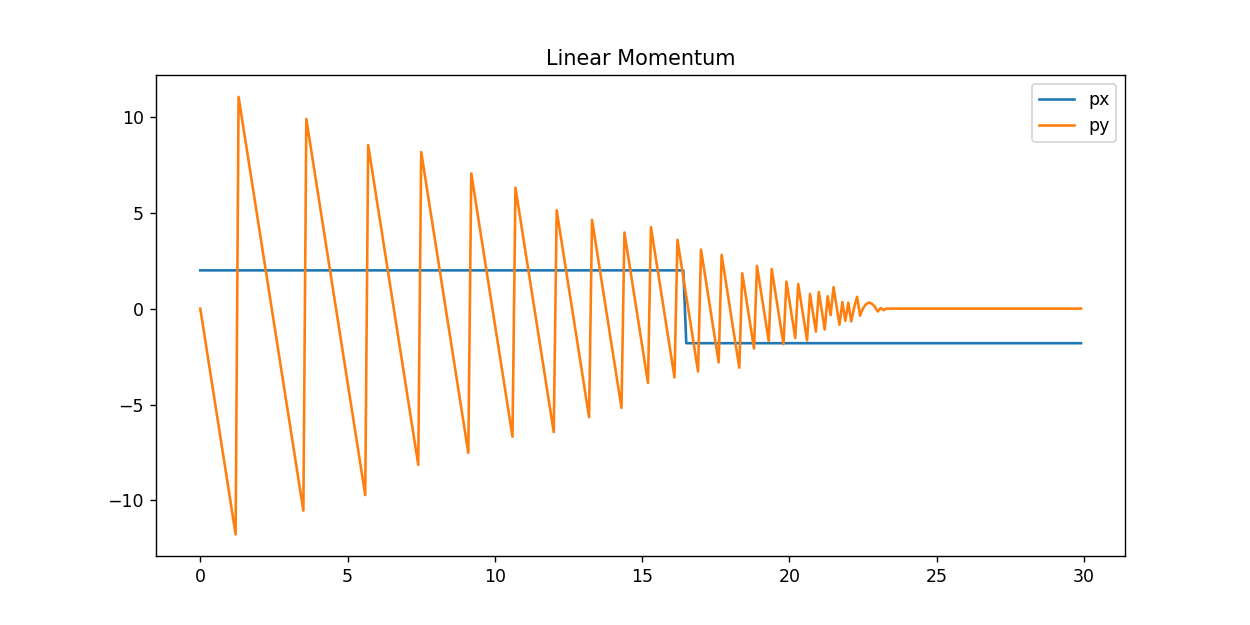

In [12]:
fig3 = plt.figure(figsize=(10,5))
ax2 = fig3.add_subplot(111)
ax2.plot(t1,MomentumT[:,0],label='px')
ax2.plot(t1,MomentumT[:,1],label='py')
ax2.set_title("Linear Momentum")
ax2.legend()

<IPython.core.display.Javascript object>


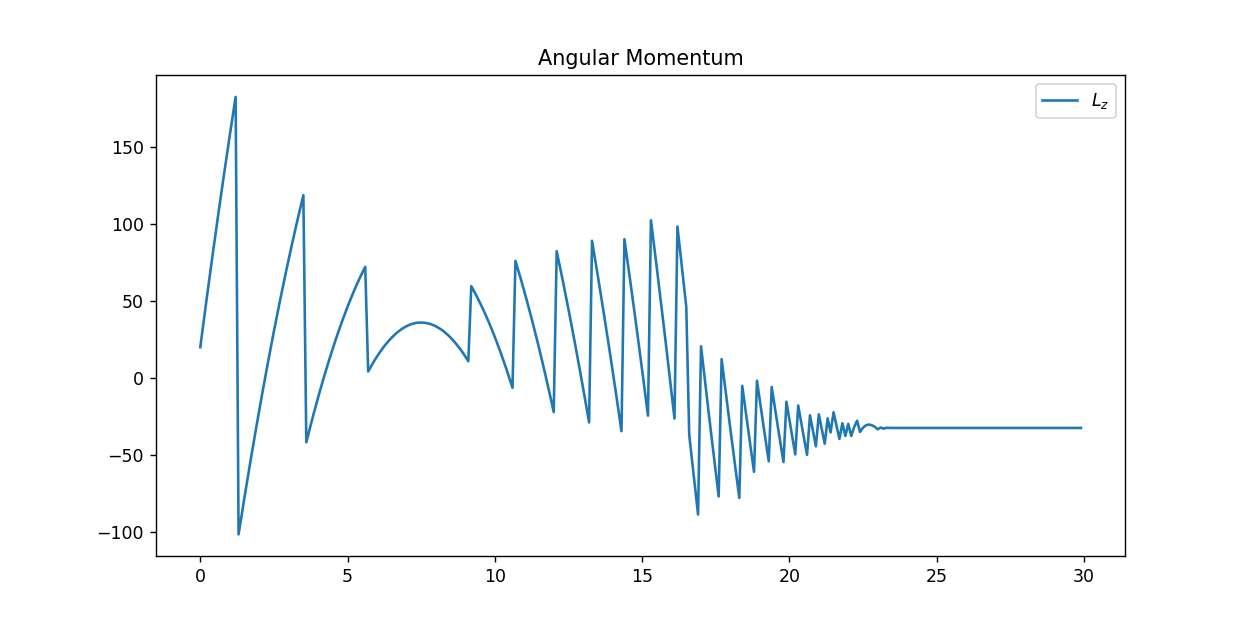

In [13]:
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(111)
ax5.plot(t1, AngularMomentumT,label=r'$L_z$')
ax5.set_title("Angular Momentum")
ax5.legend()

In [14]:
EnergyK = Particles[0].GetKineticEnergy(scale)

EnergyP = Particles[0].GetPotentialEnergy(scale)

<IPython.core.display.Javascript object>


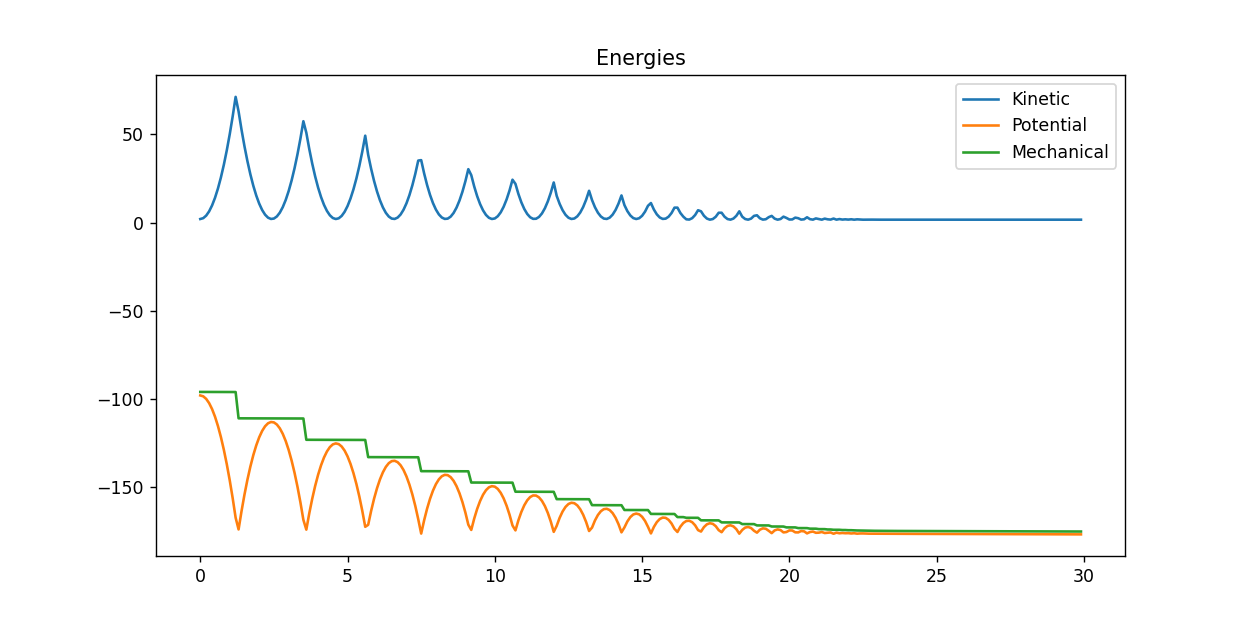

In [15]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)
ax3.plot(t1,EnergyK,label='Kinetic')
ax3.plot(t1,EnergyP,label='Potential')
ax3.plot(t1,EnergyK+EnergyP,label='Mechanical')
ax3.set_title("Energies")
ax3.legend()

In [16]:
Fx = Particles[0].GetForce(scale)[:,0]

Fy = Particles[0].GetForce(scale)[:,1]

In [17]:
Fx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<IPython.core.display.Javascript object>


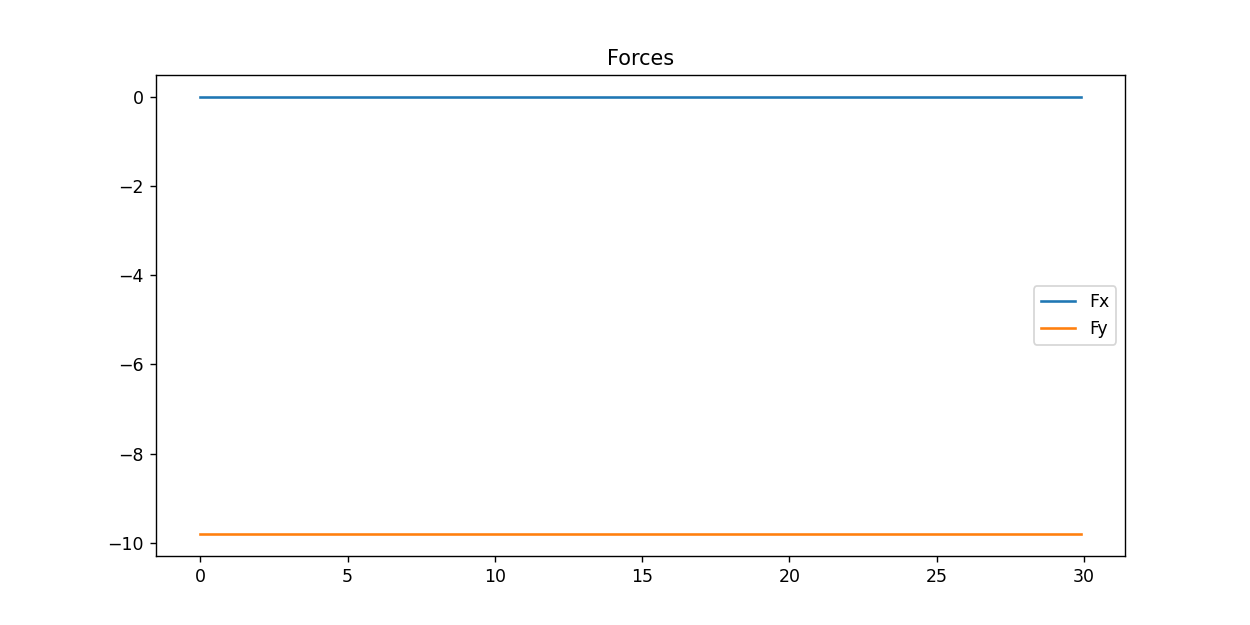

In [18]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)
ax4.plot(t1,Fx,label='Fx')
ax4.plot(t1,Fy,label='Fy')
ax4.set_title("Forces")
ax4.legend()

<IPython.core.display.Javascript object>


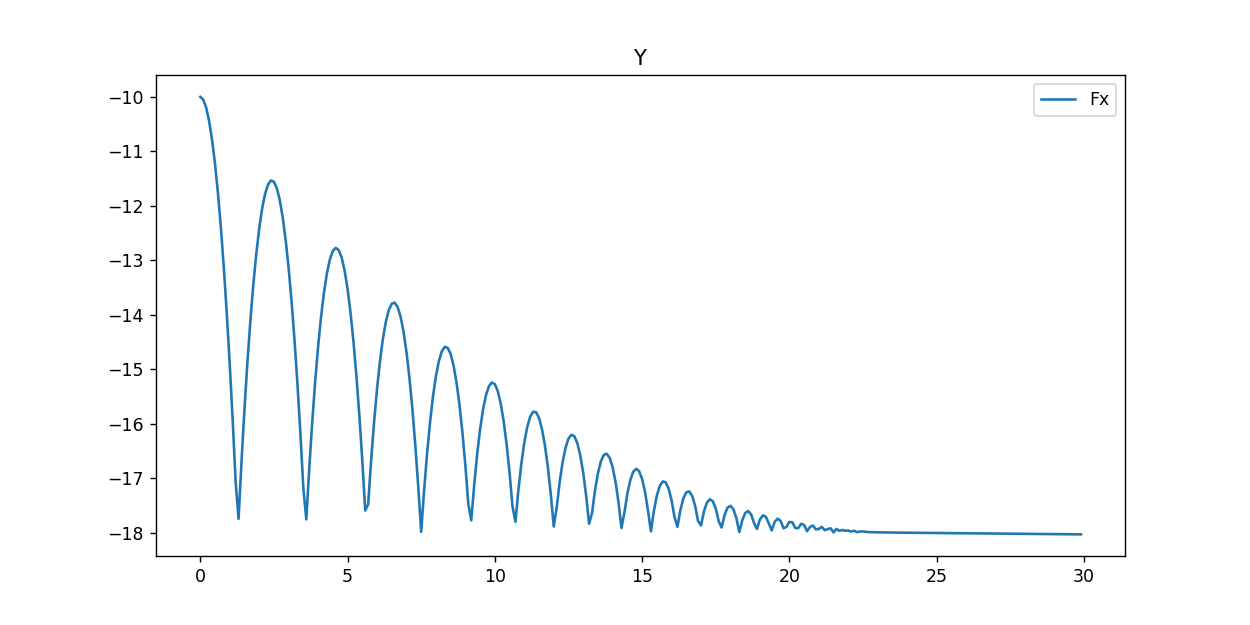

In [22]:
Y = Particles[0].GetPosition(scale)[:,1]

fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(111)
ax6.plot(t1,Y,label='Fx')
ax6.set_title("Y")
ax6.legend()

Para calcular la resitutción (suponiendo que el suelo no se mueve) se puede calcular la división de la altura del segundo pico sobre la altura del primero, y luego la raíz de este resultado.

In [24]:
e = np.sqrt(6.5/8)
e

0.9013878188659973